## Importing libraries

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading pre-trained Model

In [ ]:

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## pre-process image and Load

In [ ]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [ ]:
content_image = load_image('/content/SmartBG_2024-08-15_a4e0f3e8-30c5-42f6-b671-0c79eaad96c9.png')
style_image = load_image('/content/OIP.jpg')

## Visualize Output

In [ ]:
content_image.shape

TensorShape([1, 3464, 3464, 3])

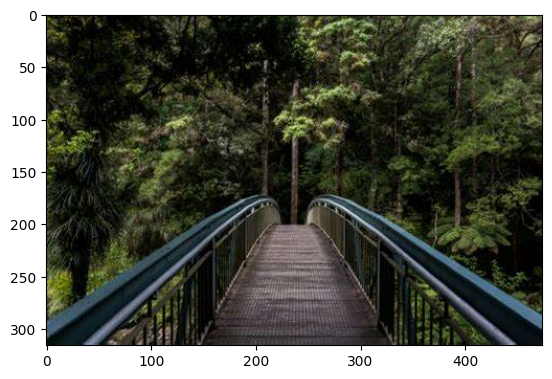

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

## Transferring Style

In [ ]:
transfer_image = model(tf.constant(content_image), tf.constant(style_image))[0]

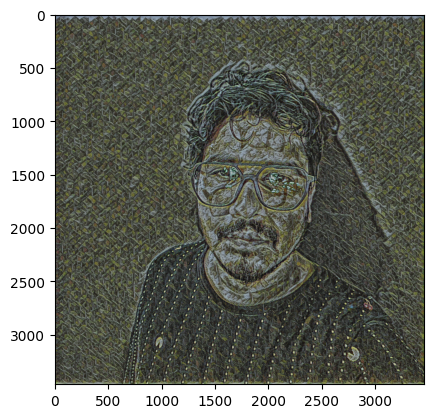

In [ ]:
plt.imshow(np.squeeze(transfer_image))
plt.show()

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(transfer_image)*255, cv2.COLOR_BGR2RGB))

True